<a href="https://colab.research.google.com/github/guscldns/TestProject/blob/main/0622/0622_07_%E1%84%8B%E1%85%A9%E1%84%83%E1%85%B5%E1%84%8B%E1%85%A9%E1%84%8C%E1%85%A5%E1%86%AB%E1%84%8E%E1%85%A5%E1%84%85%E1%85%B5_%E1%84%86%E1%85%B5%E1%86%BE_%E1%84%80%E1%85%A1%E1%86%AB%E1%84%83%E1%85%A1%E1%86%AB%E1%84%92%E1%85%A1%E1%86%AB_%E1%84%87%E1%85%AE%E1%86%AB%E1%84%85%E1%85%B2_%E1%84%8B%E1%85%A1%E1%86%A8%E1%84%80%E1%85%B5(%E1%84%89%E1%85%B5%E1%86%AF%E1%84%89%E1%85%B3%E1%86%B8).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 오디오 분류(Audio Classification)

* 가상 악기를 활용해 악기별 음색 데이터셋을 활용해 오디오 분류

1. 기존 데이터에서 분류에 사용되는 방법을 사용해 분류
2. 오디오 데이터에 특화된 분류

* 출처: https://bab2min.tistory.com/642

### 데이터 준비 및 전처리

In [ ]:
import numpy as np
import itertools
import librosa
import librosa.display
import IPython.display as ipd
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

<ipython-input-1-99cc85cc827f>:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


* 데이터를 저장할 리스트와 파일을 불러올 경로를 지정

* https://s3.ap-northeast-2.amazonaws.com/suanlab.com/dataset/GeneralMidi.wav



In [ ]:
!pip install -U --no-cache-dir gdown --pre

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Attempting uninstall: gdown
    Found existing installation: gdown 4.6.6
    Uninstalling gdown-4.6.6:
      Successfully uninstalled gdown-4.6.6


In [ ]:
!gdown --id 1r703a_qF7sbPfHnKCJqASi-zc81aZTtd

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:126: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (uriginal): https://drive.google.com/uc?id=1r703a_qF7sbPfHnKCJqASi-zc81aZTtd
From (redirected): https://drive.google.com/uc?id=1r703a_qF7sbPfHnKCJqASi-zc81aZTtd&confirm=t&uuid=83bc32d4-8b79-4651-8a01-783924c6757d
To: /content/GeneralMidi.wav
100% 3.41G/3.41G [00:37<00:00, 89.8MB/s]


In [ ]:
midi_file = '/content/GeneralMidi.wav'

* wmv 파일에는 128개 악기와 46개 타악기의 음을 50개씩 2초 간격으로 존재
* 해당 예제에서는 일부 악기(10개)만 선택해서 사용

In [ ]:
midi_file1 = '/content/drive/MyDrive/Colab Notebooks/[알파코]딥러닝6기/자연어처리 및 음성인식/GeneralMidi.wav'

In [ ]:
np.random.seed(7)
instruments = np.random.randint(0, 100, 10)
instruments

array([47, 68, 25, 67, 83, 23, 92, 57, 14, 23])

- librasa load : https://librosa.org/doc/main/generated/librosa.load.html

    - Load an audio file as a floating point time series.
    - input : librosa.load(path, *, sr=22050, mono=True, offset=0.0, duration=None, dtype=<class 'numpy.float32'>, res_type='kaiser_best')
    - output : y(audio time series), sr(sample rate)


In [ ]:
num_notes = 50
sec = 2

audio = []
inst = []

for inst_idx, note in itertools.product(range(len(instruments)), range(num_notes)):

    # 악기 인덱스
    instrument = instruments[inst_idx]

    # sound 시작 지점
    offset = (instrument*num_notes*sec) + (note*sec)  # 악기 소리 시작 지점 + Note 시작 지점
    print("instrument : {}, note:{}, offset:{}".format(instrument, note, offset))

    # librosa load
    y, sr = librosa.load(midi_file, sr = None, offset = offset, duration =2.0)
    # librosa: 오디오 다루는 라이브러리
    # offset : 파일 시작지점

    audio.append(y)
    inst.append(inst_idx)

instrument : 47, note:0, offset:4700
instrument : 47, note:1, offset:4702
instrument : 47, note:2, offset:4704
instrument : 47, note:3, offset:4706
instrument : 47, note:4, offset:4708
instrument : 47, note:5, offset:4710
instrument : 47, note:6, offset:4712
instrument : 47, note:7, offset:4714
instrument : 47, note:8, offset:4716
instrument : 47, note:9, offset:4718
instrument : 47, note:10, offset:4720
instrument : 47, note:11, offset:4722
instrument : 47, note:12, offset:4724
instrument : 47, note:13, offset:4726
instrument : 47, note:14, offset:4728
instrument : 47, note:15, offset:4730
instrument : 47, note:16, offset:4732
instrument : 47, note:17, offset:4734
instrument : 47, note:18, offset:4736
instrument : 47, note:19, offset:4738
instrument : 47, note:20, offset:4740
instrument : 47, note:21, offset:4742
instrument : 47, note:22, offset:4744
instrument : 47, note:23, offset:4746
instrument : 47, note:24, offset:4748
instrument : 47, note:25, offset:4750
instrument : 47, note:

In [ ]:
import numpy as np

audio_np = np.array(audio, np.float32)
inst_np = np.array(inst, np.int16)


#  10개의 악기*50개의 음계 = 500개의 데이터
print(audio_np.shape, inst_np.shape)

(500, 88200) (500,)


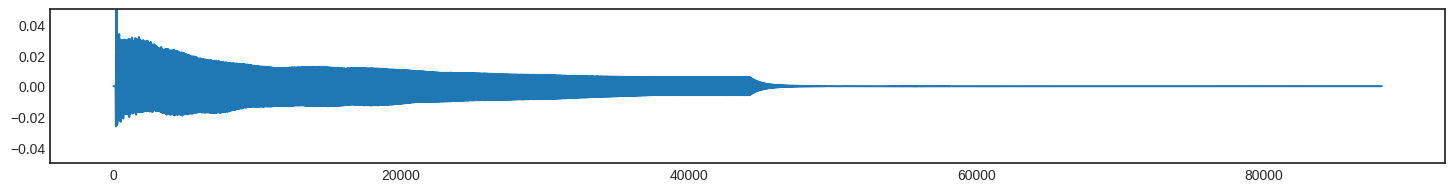

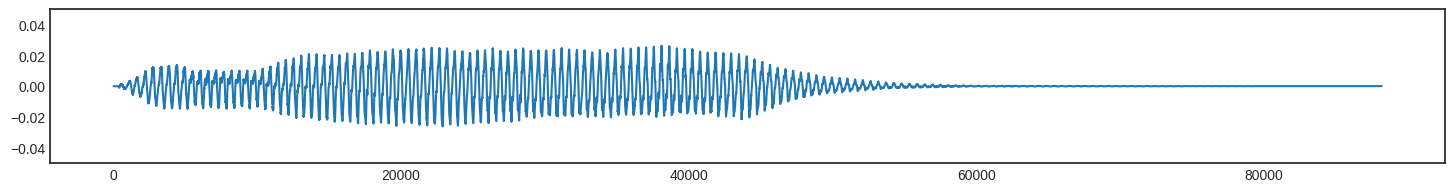

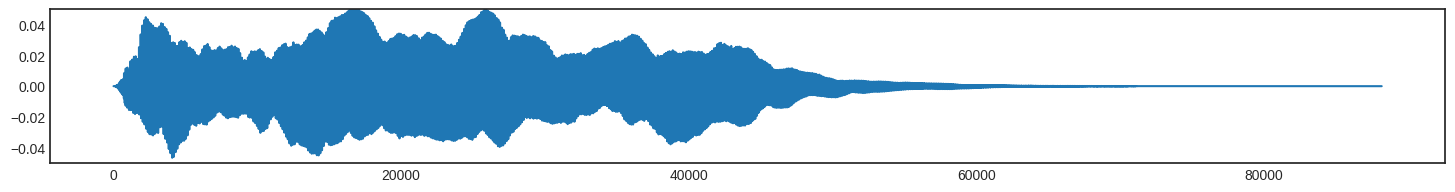

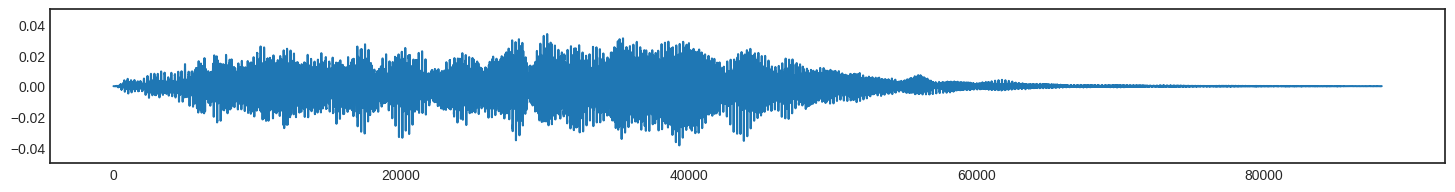

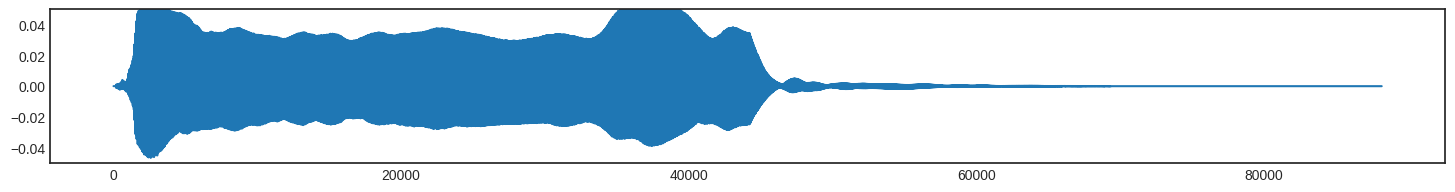

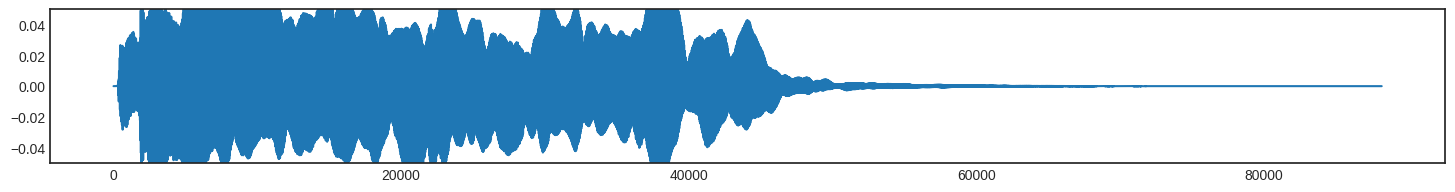

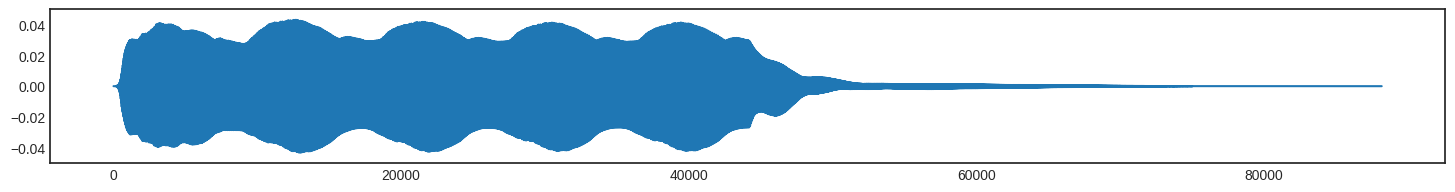

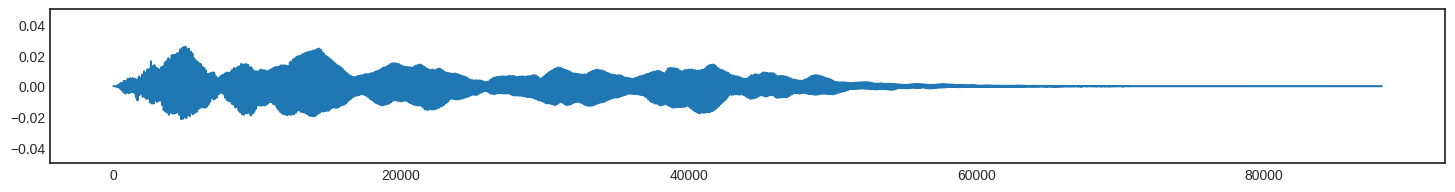

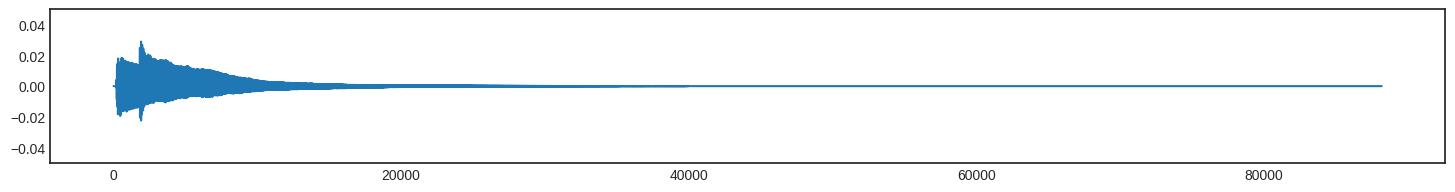

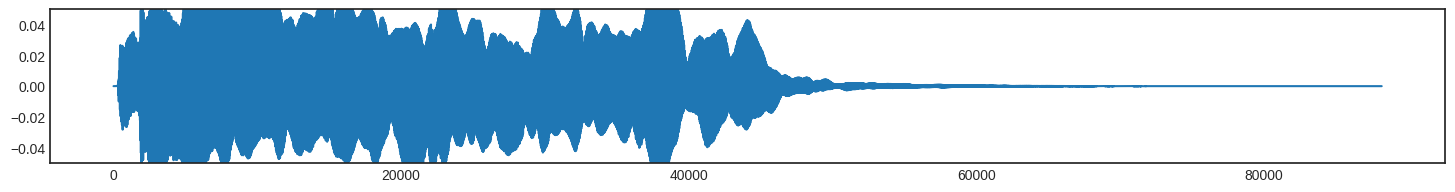

In [ ]:
for idx in range(0, len(audio_np), num_notes):
    plt.figure(figsize=(18, 2))
    plt.plot(audio_np[idx])
    plt.ylim(-0.05, 0.05)
    plt.show()

In [ ]:
print(inst_np[0])
ipd.Audio(audio_np[0], rate=sr)
# ipd.Audio : 불러온 오디오 numpy를 플레이어를 통해 소리로 나타내줌
# 프린트와 audio 모두 [ ] 바꿔주면 다른 악기/ 소리 들을 수 있다

0


In [ ]:
audio_np.shape # 88200개의 샘플이 존재

(500, 88200)

librosa 패키지는 함수의 입력으로 -1 ~ 1 사이의 데이터를 처리하기 때문에 스케일링이 필요함

In [ ]:
from sklearn.preprocessing import MinMaxScaler # 다른거 써도 됨

scaler = MinMaxScaler()
scaler.fit_transform(audio_np)

array([[0.5555556 , 0.625     , 0.5555556 , ..., 0.71428573, 0.625     ,
        0.5555556 ],
       [0.5555556 , 0.625     , 0.5555556 , ..., 0.42857143, 0.375     ,
        0.33333337],
       [0.33333337, 0.375     , 0.33333337, ..., 0.42857143, 0.375     ,
        0.33333337],
       ...,
       [0.33333337, 0.375     , 0.33333337, ..., 0.42857143, 0.375     ,
        0.33333337],
       [0.33333337, 0.375     , 0.33333337, ..., 0.5714286 , 0.5       ,
        0.44444448],
       [0.5555556 , 0.625     , 0.5555556 , ..., 0.42857143, 0.375     ,
        0.33333337]], dtype=float32)

In [ ]:
audio_np.shape # 데이터 수 변화는 없음

(500, 88200)

## 머신러닝을 이용한 오디오 분류

* 학습 데이터와 실험 데이터를 분리

In [ ]:
from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(audio_np, inst_np, test_size = 0.2)
train_x.shape, test_x.shape, train_y.shape, test_y.shape

((400, 88200), (100, 88200), (400,), (100,))

### Logistic Regression

* Logistic Regression은 특성상 다중 분류에는 적합하지 않음

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# 모델 객체 생성
LR = LogisticRegression()

# 모델 학습
LR.fit(train_x, train_y)

LogisticRegression()

In [ ]:
pred = LR.predict(test_x)
acc = accuracy_score(test_y, pred)
acc

0.05

0.53


### Random Tree

In [ ]:
from sklearn.ensemble import RandomForestClassifier

RC = RandomForestClassifier()
RC.fit(train_x, train_y)

RandomForestClassifier()

0.33


In [ ]:
pred = RC.predict(test_x)
acc = accuracy_score(test_y, pred)
acc # 10개 분류하는 문제도 성능이 낮음

0.52

## Spectrogram

### 데이터 준비

* wav는 매 순간의 음압을 측정하여 그 수치를 저장한 형태이기 때문에 그 자체로 음악을 분석하기에 적합하지 않음 (음의 높이와 세기를 듣는것이지 순간의 음압을 듣는게 아니기 때문)
* 푸리에 변환과 같은 변환 기법을 이용하여 시간 축의 데이터를 주파수 축의 데이터로 바꿔줘야할 필요가 있음

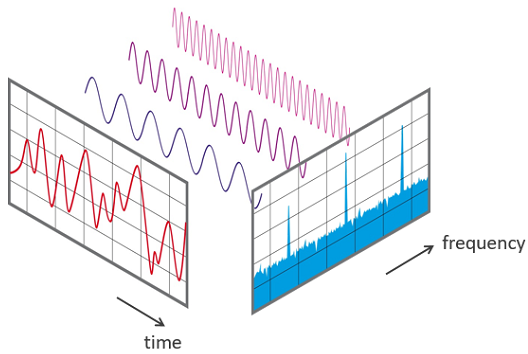

http://librosa.org/doc/main/generated/librosa.stft.html

### 1. STFT VS Spectrogram
STFT의 단순히 진폭(magnitude) 부분을 취해서 db스케일로만 변환해주면 spectrogram이 됩니다.

즉, stft은 복소수로 리턴되므로 np.abs를 이용해서 amplitude로 바꿔줍니다.
- librosa.amplitude_to_db()를 이용해 stft을 dB 스케일로 바꿔주면 스펙트로그램이 된다.

스펙트로그램은 STFT의 결과를 시각화하는 방법입니다. 스펙트로그램은 시간에 따른 신호의 주파수 내용을 2차원 이미지로 표시합니다. x축은 시간, y축은 주파수, 그리고 색상은 해당 시간과 주파수에서의 신호의 강도(또는 크기)를 나타냅니다. 따라서, 스펙트로그램은 우리가 시간에 따른 신호의 주파수 변화를 시각적으로 이해하는 데 도움이 됩니다.

### 2. How to STFT?
-  y : np.ndarray [shape=(…, n)]
    real-valued input signal. Multi-channel is supported.

- n_fft : int > 0 [scalar]
length of the windowed signal after padding with zeros. The number of rows in the STFT matrix D is (1 + n_fft/2).
    - FFT에서 사용되는 윈도우의 크기(샘플의 수)
    - 즉, 윈도우 내의 샘플의 총 수 = 초 당 샘플의 수 x 윈도우 길이

    `n_fft = sample rate * window length`

    - 예를 들어, 23miliseconds의 윈도우 길이와 44100Hz의 샘플레이트를 가지고 있을 때, n_fft = 0.023 x 44100 = 1014.3 (1014개의 샘플이 생긴다)
    - 이때, 2의 거듭제곱을 선호하므로, 가장 가까운 2의 거듭제곱 값인 1024를 선택!

- hop_length : int > 0 [scalar]
number of audio samples between adjacent STFT columns.

    -  hop_length : 윈도우가 이동하는 길이
    - 즉, hop_length : 한 윈도우의 끝에서 다음 윈도우의 시작까지의 샘플 수
    - hop_length가 작을수록 시간 해상도가 높아지고, hop_length가 클수록 주파수 해상도가 높아집니다.
    - If unspecified, defaults to win_length // 4 (see below).

- win_length : int <= n_fft [scalar]
    - STFT에서 각각의 윈도우의 길이를 결정하는 파라미터
    - win_length가 n_fft보다 작으면, 윈도우는 n_fft - win_length 샘플로 제로 패딩됩니다


STFT에서 시간과 FFT는 다음과 같은 관계가 있습니다. STFT의 시간 차원은 보통 윈도우 크기를 결정하는 n_fft를 이용하여 조절합니다.

- n_fft가 작을수록 STFT의 시간 축 해상도가 높아집니다. 즉, STFT는 짧은 시간 동안 주파수 정보를 캡처할 수 있습니다.
- n_fft가 클수록 STFT의 주파수 축 해상도가 높아집니다. 즉, STFT는 더 넓은 주파수 범위를 캡처할 수 있습니다.


#### STFT 결과값
librosa에서 stft 함수를 사용하여 stft를 계산하면, 결과는 크기가 (1+n_fft/2, n_frames)인 행렬로 반환됩니다.

- 여기서 n_fft는 푸리에 변환에 사용되는 윈도우 크기입니다. 이 값을 크게 설정하면 더 세부적인 주파수 정보를 얻을 수 있지만, 계산 비용이 증가합니다.

- 1+n_fft/2는 stft의 결과로 생성되는 주파수 bin의 수입니다. 이 값은 n_fft/2 + 1 로 계산됩니다. 이는 주파수 영역의 대칭성 때문입니다. (STFT 결과는 가운데를 기준으로 대칭이 됩니다. 뒤에 부분은 앞의 부분과 동일함으로 1/2로 계산됩니다.)


- n_frames는 시간 축의 프레임 수입니다. n_frames는 입력 신호의 총 샘플 수를 hop_length로 나눈 값에 가까울 것입니다(소수점 아래를 버림). 하지만 실제 n_frames의 값은 신호의 시작과 끝에서 추가적인 패딩이 적용되거나, 신호의 길이가 hop_length로 딱 나누어 떨어지지 않는 경우에는 이 값과 약간 다를 수 있습니다


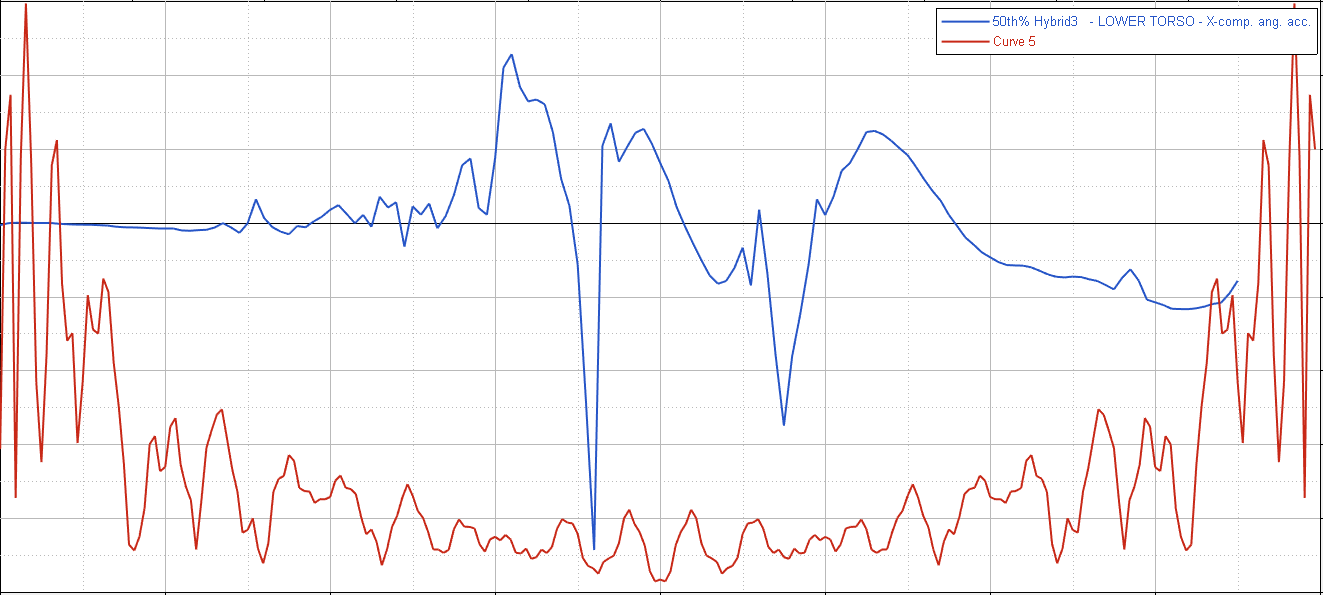

In [38]:
sr

44100

In [ ]:
sr*0.025 # 1102인데 2의 배수로 맞춰야 해서 1024로 맞춘다

1102.5

In [ ]:
# hop length = n_fft // 4
88100 *4 /1024 # 샘플 모양

344.140625

In [ ]:
audio_np[0].shape

(88200,)

In [ ]:
# STFT
D = librosa.stft(audio_np[0], n_fft = 1024)
D.shape # 2차원으로 받아옴

(513, 345)

In [ ]:
# spectrogram : 데시벨 차원으로 바꿔줬다

D = np.abs(D) # 절대값으로 변환

spectrogram = librosa.amplitude_to_db(D, ref = np.max) # 스펙토그램으로 변환: 데시벨로 변환
spectrogram # librosa.stft, np.abs , librosa.amplitude_to_db 함수를 써야 한다

array([[-21.871693, -20.979906, -32.233284, ..., -54.153656, -54.160065,
        -56.487297],
       [-21.128166, -19.337927, -32.373432, ..., -60.167458, -59.965332,
        -59.57923 ],
       [-19.583769, -15.836401, -22.114471, ..., -80.      , -80.      ,
        -69.56642 ],
       ...,
       [-80.      , -80.      , -80.      , ..., -80.      , -80.      ,
        -80.      ],
       [-80.      , -80.      , -80.      , ..., -80.      , -80.      ,
        -80.      ],
       [-80.      , -80.      , -80.      , ..., -80.      , -80.      ,
        -80.      ]], dtype=float32)

In [ ]:
spectrogram.shape # D.shape와 동일

(513, 345)

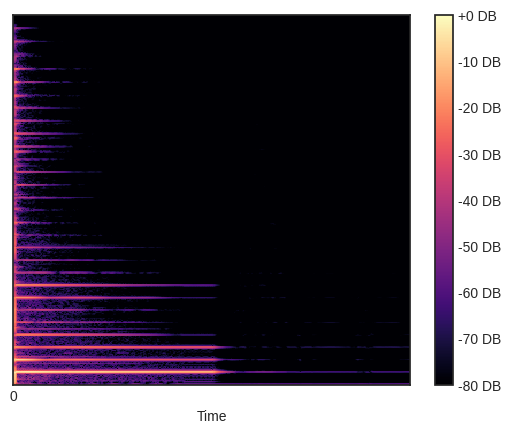

In [ ]:
# 시각화
librosa.display.specshow(spectrogram, x_axis='time')
plt.colorbar(format = '%+2.0f DB')
plt.xticks(range(0, 1))
plt.show()

In [ ]:
import librosa

def wav2spec(wav, fft_size = 1024):
    D = np.abs(librosa.stft(wav, n_fft = fft_size))
    spectrogram = librosa.amplitude_to_db(D, ref = np.max)
    return spectrogram

- FFT는 대칭으로 나오기 때문에 절반만 사용

In [ ]:
# 전체 데이터에 적용

audio_spec = []
for a in audio_np:
    audio_spec.append(wav2spec(a))

In [ ]:
# numpy 변환
spec_np = np.array(audio_spec, np.float32)
inst_np = np.array(inst, np.int16)

print(spec_np.shape, inst_np.shape)

(500, 513, 345) (500,)


In [ ]:
# shape 확인

Waveform shape :  (88200,)
Spectrogram shape :  (513, 345)


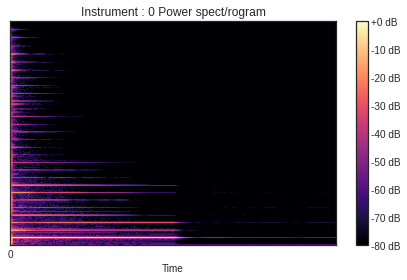

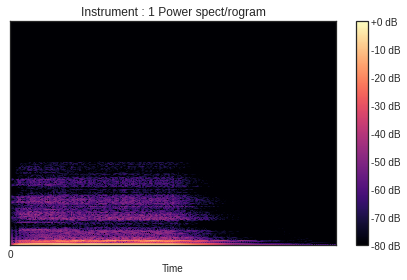

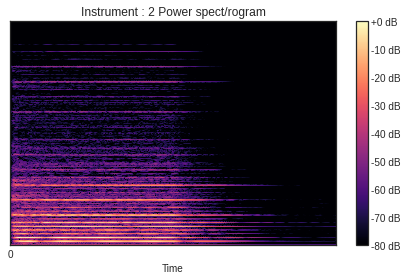

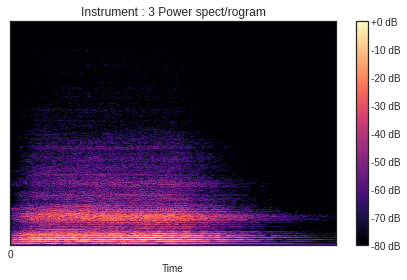

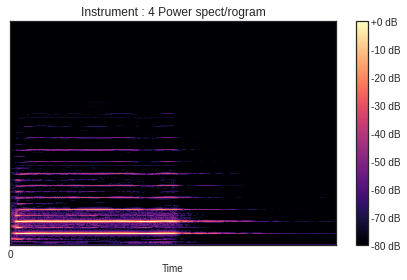

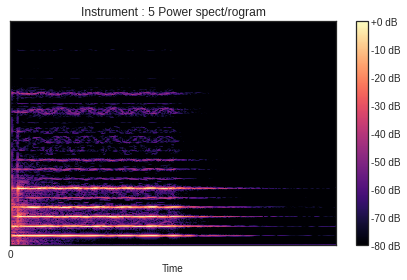

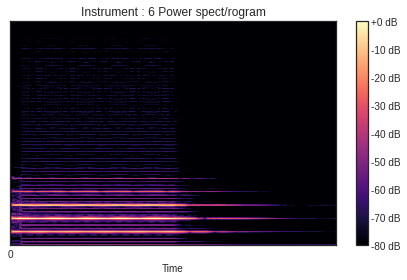

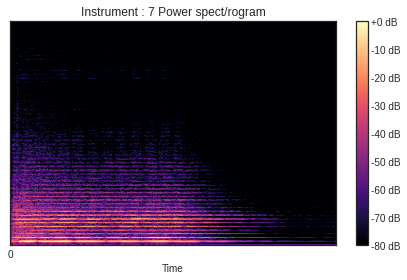

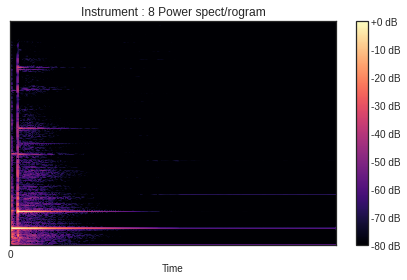

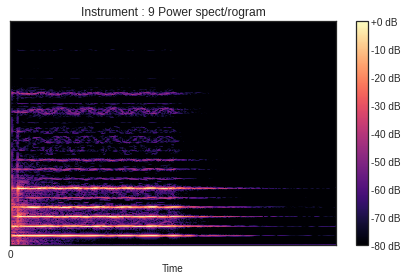

#### Modeling

In [ ]:
# 현재 3차원이라 RandomForest에 들어갈 수 있는 2차원으로 변경 필요

spec_X = spec_np.reshape(500, -1)
spec_X.shape

(500, 176985)

In [ ]:
train_x, test_x, train_y, test_y = train_test_split(spec_X, inst_np, test_size = 0.2)

In [ ]:
# LR
LR = LogisticRegression()
LR.fit(train_x, train_y)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
LR.score(train_x, train_y), LR.score(test_x, test_y)

(0.9175, 0.68)

In [ ]:
RF = RandomForestClassifier()
RF.fit(train_x, train_y)
RF.score(train_x, train_y), RF.score(test_x, test_y)

(0.92, 0.82)

왜 이런 결과가 나올까요?

* 오디오 데이터를 spectrogram으로 가공하면 파장과 세기를 가진 이미지(2차원 배열)가 생성
* 이 spectrogram을 CNN 이미지 분류를 통해 각 악기 소리를 분류

### DNN 모델 구성

In [ ]:
import tensorflow as tf
from tensorflow.keras.utils import to_categorical

spec_np = np.array(audio_spec, np.float32)
spec_array = np.expand_dims(spec_np, -1)
inst_cat = to_categorical(inst_np) # one hot vector로 변환

train_x, test_x, train_y, test_y = train_test_split(spec_np, inst_cat, test_size = 0.2)

print(train_x.shape)
print(test_x.shape)
print(train_y.shape)
print(test_y.shape)

(400, 513, 345)
(100, 513, 345)
(400, 10)
(100, 10)


In [ ]:
test_y

In [ ]:
from keras.models import Sequential
from keras.layers import Input, Dense, Flatten

model = Sequential()




In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 179270)            0         
                                                                 
 dense_3 (Dense)             (None, 256)               45893376  
                                                                 
 dense_4 (Dense)             (None, 128)               32896     
                                                                 
 dense_5 (Dense)             (None, 10)                1290      
                                                                 
Total params: 45,927,562
Trainable params: 45,927,562
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# fitting

In [ ]:
def plot_history(history_dict):
    loss = history_dict['loss']
    val_loss = history_dict['val_loss']

    epochs = range(1, len(loss)+1)
    fig = plt.figure(figsize=(14, 5))

    ax1 = fig.add_subplot(1, 2, 1)
    ax1.plot(epochs, loss, 'b--', label = 'train_loss')
    ax1.plot(epochs, val_loss, 'r--', label = 'val_loss')
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Loss')
    ax1.grid()
    ax1.legend()

    acc = history_dict['acc']
    val_acc = history_dict['val_acc']

    ax2 = fig.add_subplot(1, 2, 2)
    ax2.plot(epochs, acc, 'b--', label = 'train_acc')
    ax2.plot(epochs, val_acc, 'r--', label = 'val_acc')
    ax2.set_xlabel('Epochs')
    ax2.set_ylabel('Accuracy')
    ax2.grid()
    ax2.legend()

    plt.show()

In [ ]:
plot_history(history.history)

In [ ]:
model.evaluate(test_x, test_y)

## MFCC를 이용한 머신러닝 오디오 분류

### 데이터 준비

* 데이터를 불러오고 MFCC(Mel-frequency cepstral coefficients)를 사용해 melspectrogram으로 변환

In [ ]:
# Mel Spectrogram 계산
S = librosa.feature.melspectrogram(y=audio_np, sr=sr, n_fft=1024)
S_DB = librosa.power_to_db(S, ref=np.max)

In [ ]:
S.shape

(500, 128, 173)

In [ ]:
S_DB.shape

(500, 128, 173)



*   분류기에서 사용하기 위해 3차원 벡터를 2차원 벡터로 변환



In [ ]:
spec_X = S_DB.reshape(500, -1)
spec_X.shape

(500, 22144)



*   읽어온 데이터는 음량이나 범위가 다를 수 있음
*   min-max scaling을 통해 데이터의 범위를 조정함



In [ ]:
from sklearn.preprocessing import MinMaxScaler # 다른거 써도 됨

scaler = MinMaxScaler()
scaler.fit_transform(audio_np)

* 학습 데이터와 실험 데이터를 분리

In [ ]:
from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(audio_np, inst_np, test_size = 0.2)
train_x.shape, test_x.shape, train_y.shape, test_y.shape

### Decision Tree

In [ ]:
train_x, test_x, train_y, test_y = train_test_split(spec_X, inst_np, test_size = 0.2)

In [ ]:
LR = LogisticRegression()
LR.fit(train_x, train_y)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
LR.score(train_x, train_y), LR.score(test_x, test_y)

(0.8925, 0.51)

In [ ]:
RF = RandomForestClassifier()
RF.fit(train_x, train_y)
RF.score(train_x, train_y), RF.score(test_x, test_y)

(0.98, 0.71)

## MFCC를 이용한 딥러닝 오디오 분류

* 앞선 문제점을 극복하기 위해 오디오 데이터에 특화된 분류 방법 필요
* 오디오 데이터를 spectrogram으로 가공하면 파장과 세기를 가진 이미지(2차원 배열)가 생성
* 이 spectrogram을 CNN 이미지 분류를 통해 각 악기 소리를 분류

### CNN 모델 구성



*   spectrogram을 분류할 CNN 모델 구성
*   모델의 구성은 여타 이미지 분류 모델과 다르지 않음
*   spectrogram은 1차원 이미지로 간주


In [ ]:
print(train_x.shape)

(400, 20, 173, 1)


In [ ]:
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

input_shape = 20, 173, 1

model = Sequential([
  layers.Input(shape = input_shape),
  layers.Conv2D(32, 3, activation ='relu'),
  layers.MaxPooling2D(pool_size=(2,2), padding='same'),
  layers.Conv2D(64, 3, activation ='relu'),
  layers.MaxPooling2D(pool_size=(2,2), padding='same'),
  layers.Conv2D(128, 3, activation ='relu'),
  layers.MaxPooling2D(pool_size=(2,2), padding='same'),
  layers.Dropout(0.25),
  layers.Flatten(),
  layers.Dense(256, activation='relu'),
  layers.Dense(128, activation='relu'),
  layers.Dense(10, activation='softmax'),
])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 18, 171, 32)       320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 9, 86, 32)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 7, 84, 64)         18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 4, 42, 64)        0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 2, 40, 128)        73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 1, 20, 128)      

In [ ]:
model.compile(optimizer = 'adam', loss='categorical_crossentropy', metrics=['acc'])

In [ ]:
history = model.fit(train_x, train_y, epochs = 30, batch_size=128, validation_split=0.2)

Epoch 1/30
3/3 [==============================] - 2s 580ms/step - loss: 16.7498 - acc: 0.1250 - val_loss: 17.0171 - val_acc: 0.1375
Epoch 2/30
3/3 [==============================] - 2s 487ms/step - loss: 12.2968 - acc: 0.0906 - val_loss: 4.0656 - val_acc: 0.1500
Epoch 3/30
3/3 [==============================] - 2s 495ms/step - loss: 3.6492 - acc: 0.1281 - val_loss: 2.9572 - val_acc: 0.0750
Epoch 4/30
3/3 [==============================] - 2s 497ms/step - loss: 2.6449 - acc: 0.1469 - val_loss: 2.3323 - val_acc: 0.1000
Epoch 5/30
3/3 [==============================] - 2s 490ms/step - loss: 2.2330 - acc: 0.1875 - val_loss: 2.2975 - val_acc: 0.1000
Epoch 6/30
3/3 [==============================] - 2s 493ms/step - loss: 2.1871 - acc: 0.2000 - val_loss: 2.2083 - val_acc: 0.2375
Epoch 7/30
3/3 [==============================] - 2s 497ms/step - loss: 2.0647 - acc: 0.2906 - val_loss: 2.1302 - val_acc: 0.2250
Epoch 8/30
3/3 [==============================] - 2s 497ms/step - loss: 1.9493 - acc: 0

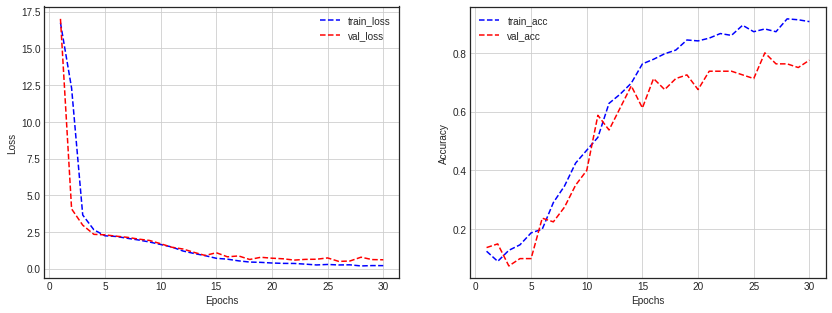

In [ ]:
plot_history(history.history)



*   훈련한 모델에 대한 정확도 평가
*   앞선 일반 분류 방법보다 정확도가 많이 오른 것을 확인할 수 있음



In [ ]:
model.evaluate(test_x, test_y)

4/4 [==============================] - 0s 31ms/step - loss: 0.3157 - acc: 0.8500


[0.3157031238079071, 0.8500000238418579]